# In questo notebook eseguo delle analisi sugli hashtag più comuni

In [43]:
import pandas as pd

In [8]:
user_ids = []
id_utenti = []
hashtags = []
to_delete = []

In [3]:
r = open('Dati_utente-tweet_covid.csv', 'r', encoding='utf-8')

In [4]:
for line in r:
    line = line.strip()
    id_riga, id_utente_corrente, tweet_totali_corrente, tweet_positivi_corrente, tweet_neutrali_corrente, tweet_negativi_corrente, tweet_covid_totali_corrente = line.split(",")
    user_ids.append(id_utente_corrente)

In [5]:
r.close()

In [27]:
r = open('userandhashtags_pt4_pt2.csv', 'r', encoding='utf-8')

In [28]:
for line in r:
    line = line.strip()
    id_utente_corrente, hashtag_corrente = line.split(",")
    id_utenti.append(id_utente_corrente)
    hashtags.append(hashtag_corrente)
    if id_utente_corrente not in user_ids:
        to_delete.append(id_utente_corrente)

In [29]:
r.close()

In [30]:
df = pd.DataFrame(list(zip(id_utenti, hashtags)), columns=['id_utente', 'hashtag'])

In [32]:
only_good_users = df.loc[~df['id_utente'].isin(to_delete)]

In [1]:
only_good_users.drop_duplicates()

In [42]:
only_good_users.to_csv('covidusersandhashtags.csv', index=False)

# altro

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
id_utenti = []
hashtags = []
numero_hashtags = []

In [46]:
r = open('Conteggio_hashtag_covidusers/part-00000', 'r', encoding='utf-8')

In [47]:
for line in r:
    line = line.strip()
    id_utente_corrente, hashtag_corrente, numero_hashtags_corrente = line.split(",")
    id_utenti.append(id_utente_corrente)
    hashtags.append(hashtag_corrente)
    numero_hashtags.append(int(numero_hashtags_corrente))

In [48]:
r.close()

In [49]:
df = pd.DataFrame(list(zip(id_utenti, hashtags, numero_hashtags)), columns=['id_utente', 'hashtag', 'frequenza'])

In [50]:
hashtag_df = df.groupby('hashtag').sum()

In [65]:
hashtag_df.sort_values(by='frequenza', ascending=False)

,frequenza
hashtag,
Ukraine,57218
Russia,41831
auspol,35913
China,34546
COVID19,34062
...,...
N979HP,1
N95sSaveLives,1
N95s4All,1


In [64]:
ordered_df = hashtag_df.sort_values(by='frequenza', ascending=False)

In [60]:
relevant_hashtags_df = hashtag_df.loc[hashtag_df['frequenza'] > 999]

In [61]:
relevant_hashtags_df

,frequenza
hashtag,
100daysofcode,1128
1990s,2104
1u,1270
30Seconds,3158
360WiSE,3057
...,...
yum,2351
yyc,6035
yyccc,2255


<AxesSubplot:xlabel='hashtag'>

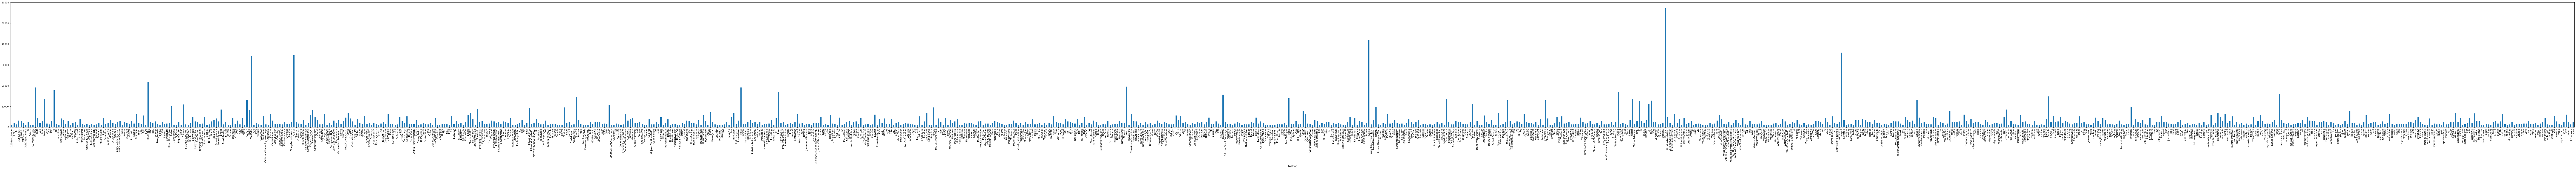

In [62]:
relevant_hashtags_df.plot(kind='bar', legend=False, figsize=(200,10))

In [66]:
ordered_df.to_csv('coviduser_hashtag.csv')